In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn

In [2]:
df = pd.read_csv("q5_train.csv")
lmbda = [0.0001]
for i in range(10):
    lmbda.append(lmbda[i]*10)

from sklearn.linear_model import Lasso, Ridge

In [12]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,-0.079169,0.074364,0.081928,-0.033283,-0.088749,0.070283,0.285273,0.347548,0.917105
std,0.925317,1.012305,1.304607,1.247467,1.467449,0.969372,1.917598,7.667971,5.020843
min,-2.619745,-2.025143,-4.118158,-3.112832,-4.163859,-2.481295,-4.639841,-40.282934,-10.036450
25%,-0.571875,-0.758508,-0.739871,-0.752772,-0.990666,-0.577054,-1.194308,-0.351381,-2.293765
50%,-0.073228,0.185544,0.095554,-0.063393,-0.030977,-0.047225,0.486986,-0.031732,1.218981
75%,0.382786,0.662315,0.966070,0.755977,0.765230,0.731163,1.666643,0.337055,4.908557
max,2.463242,3.852731,4.339446,3.230194,3.392913,2.515546,5.790406,57.567106,11.343062


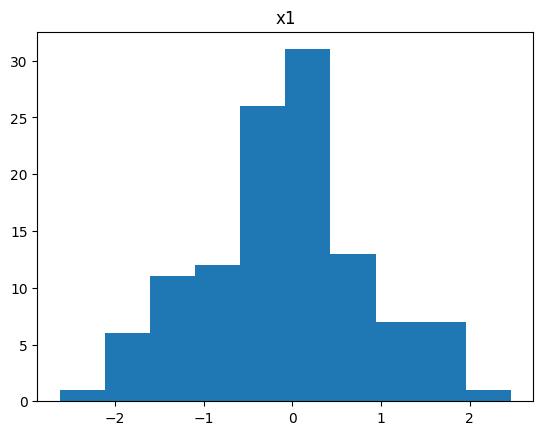

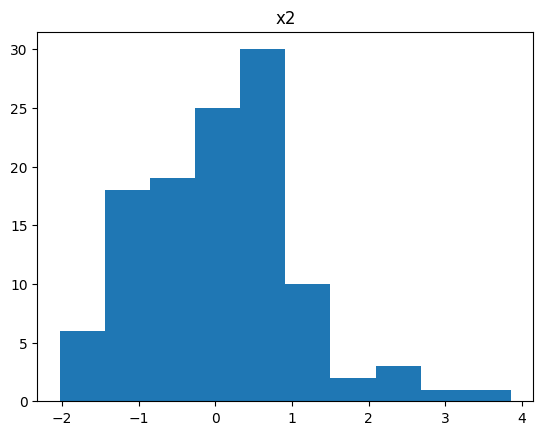

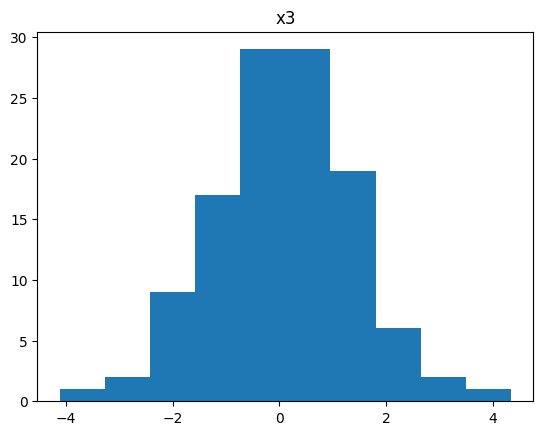

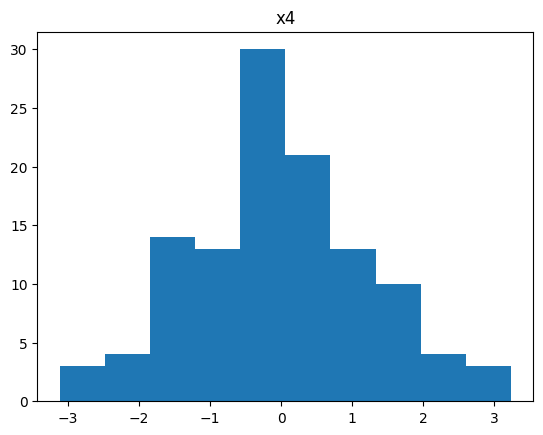

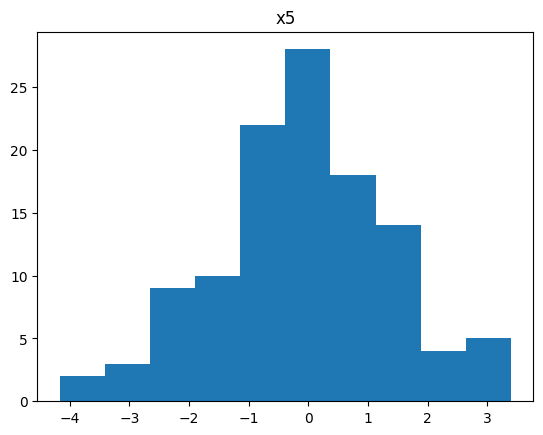

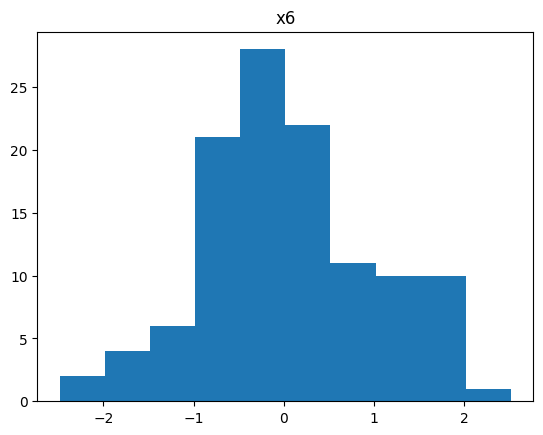

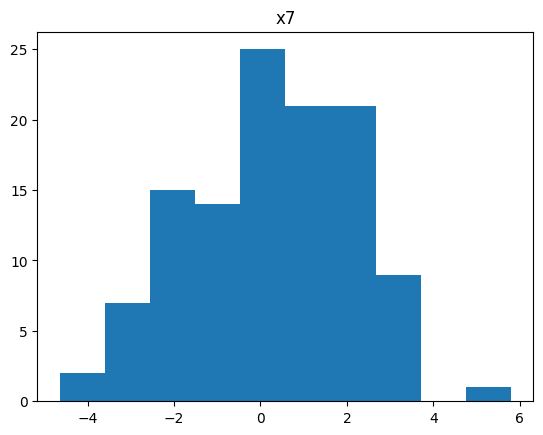

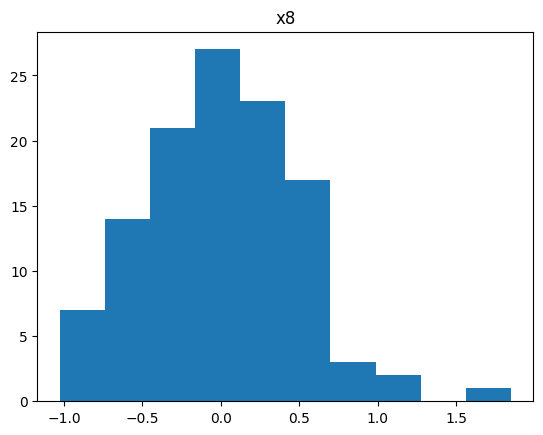

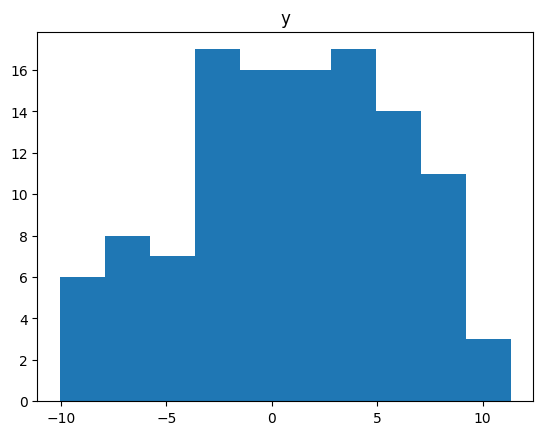

In [39]:
for col in df.columns:
    plt.figure()
    plt.hist(filtered_df[col], bins=10)
    plt.title(col)

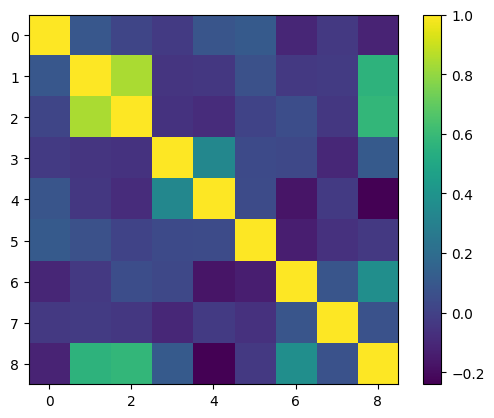

In [15]:
plt.imshow(df.corr())
plt.colorbar()

In [17]:
filtered_df = df[(df['x8']>-5) & (df['x8']<15)]

In [19]:
filtered_df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,-0.085293,0.067793,0.069057,-0.015183,-0.075317,0.042469,0.256634,0.007217,0.930400
std,0.930935,1.013095,1.316892,1.253432,1.490770,0.970244,1.899867,0.485517,5.038039
min,-2.619745,-2.025143,-4.118158,-3.112832,-4.163859,-2.481295,-4.639841,-1.026009,-10.036450
25%,-0.601173,-0.763281,-0.748503,-0.753366,-0.967943,-0.595164,-1.210921,-0.328037,-2.318814
50%,-0.035826,0.184634,0.064244,-0.049655,-0.023432,-0.069023,0.452998,-0.027403,1.239272
75%,0.389874,0.653972,0.915637,0.761185,0.806464,0.623452,1.648170,0.331888,4.909426
max,2.463242,3.852731,4.339446,3.230194,3.392913,2.515546,5.790406,1.847128,11.343062


# Task 1

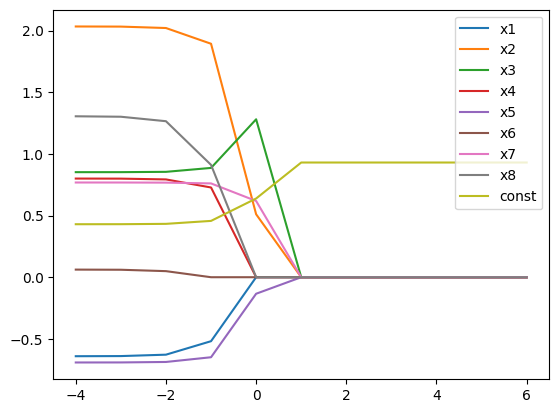

In [23]:
coefs = []
consts = []
for l in lmbda:
    md = Lasso(alpha=l)
    md.fit(filtered_df[list(filtered_df.columns)[:-1]], filtered_df['y'])
    coefs.append(md.coef_)
    consts.append(md.intercept_)

coefs = np.stack(coefs, axis=0)
consts = np.array(consts).reshape((-1, 1))
coefs = np.concatenate([coefs, consts], axis=1)

plt.plot(np.log10(lmbda), coefs)
plt.legend(labels = list(df.columns)[:-1]+['const'])


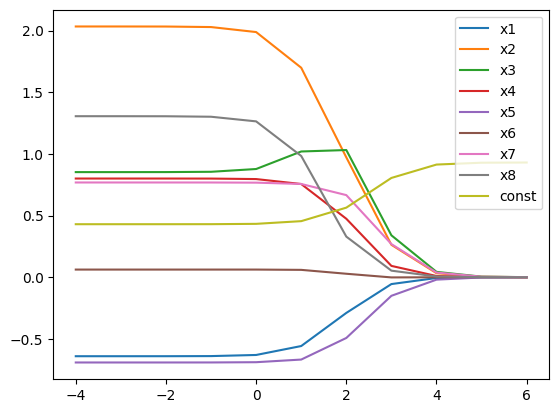

In [24]:
coefs = []
consts = []
for l in lmbda:
    md = Ridge(alpha=l)
    md.fit(filtered_df[list(df.columns)[:-1]], filtered_df['y'])
    coefs.append(md.coef_)
    consts.append(md.intercept_)

coefs = np.stack(coefs, axis=0)
consts = np.array(consts).reshape((-1, 1))
coefs = np.concatenate([coefs, consts], axis=1)

plt.plot(np.log10(lmbda), coefs)
plt.legend(labels = list(df.columns)[:-1]+['const'])

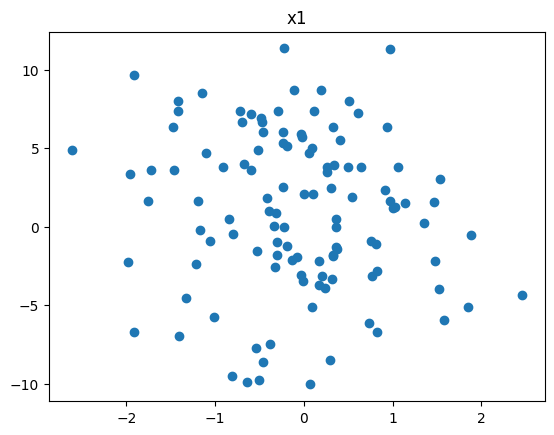

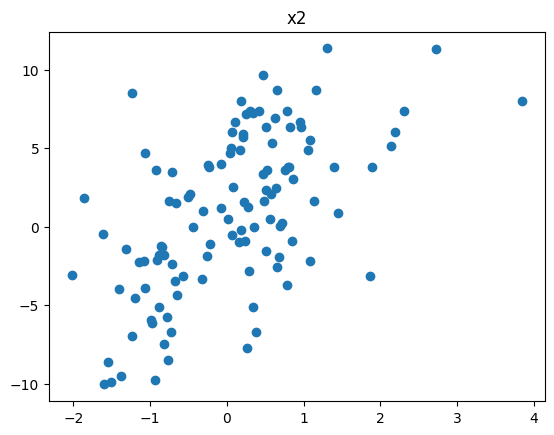

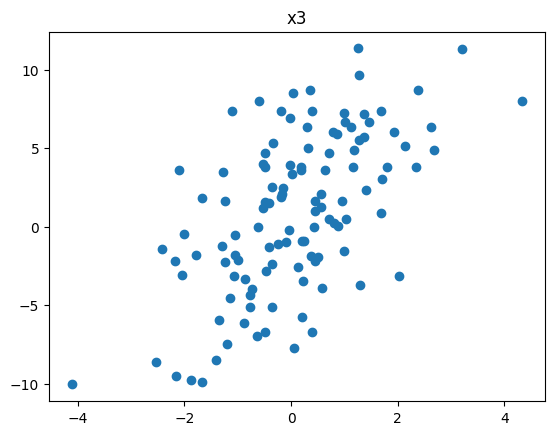

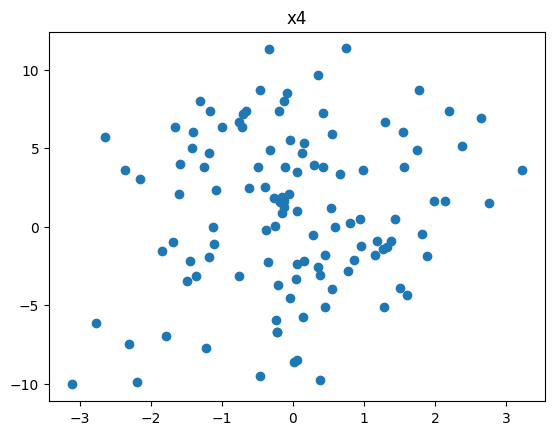

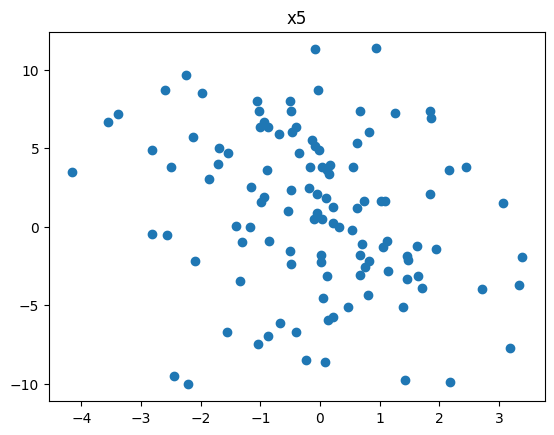

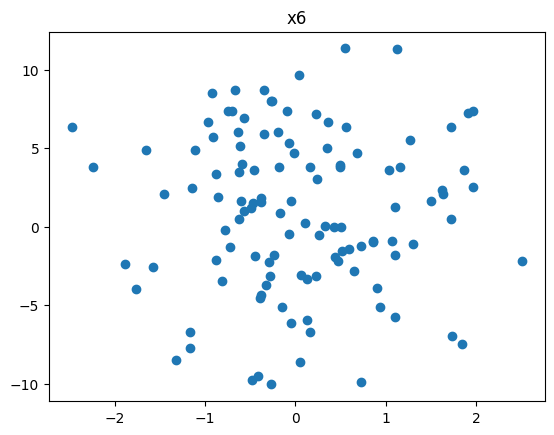

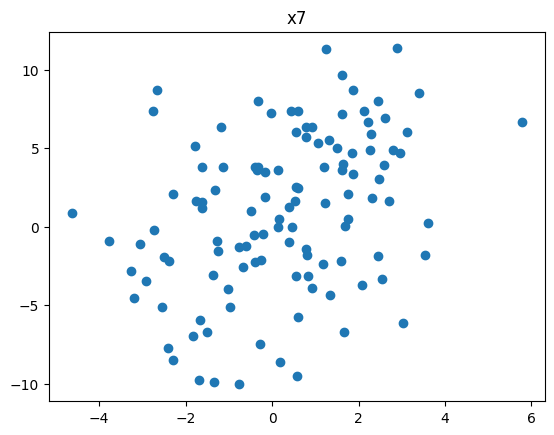

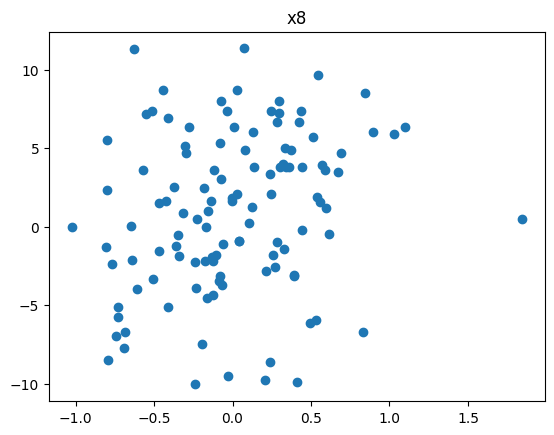

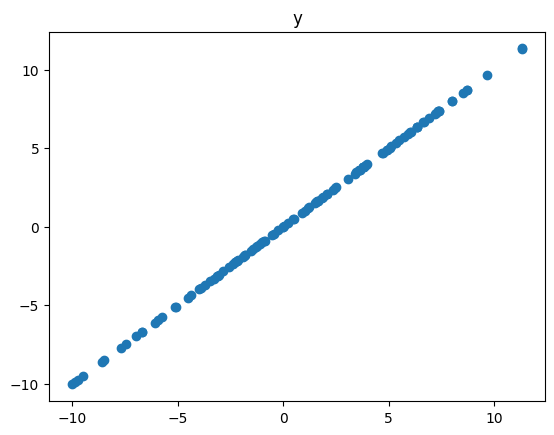

In [38]:
for col in df.columns:
    plt.figure()
    plt.scatter(filtered_df[col], filtered_df['y'])
    plt.title(col)

In [26]:
def mse(coefs, X, y):
   X2 = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
   diff = ( y.reshape((1, -1)) - coefs @ X2.T )**2
   mse = np.mean(diff, axis=1)
   return mse.reshape((-1, 1))

def r2(coefs, X, y):
   X2 = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
   diff = ((y.reshape((1, -1)))-coefs@X2.T )**2
   ssq = np.sum(diff, axis=1).reshape((-1, 1))
   ym = np.mean(y)
   vary = np.sum((y-ym)**2)
   toret = (1-ssq/vary).reshape((-1, 1))
   return toret

In [28]:
def train_ridge(df):
    cols = np.array(df.columns, dtype="str")
    cols = cols[cols != "y"]
    X = df[cols]
    y = df["y"]
    lmbda = [0.003]
    const = []
    for i in range(15):
        lmbda.append(lmbda[i]*3)
    coefs = []
    for l in lmbda:
        md = Ridge(alpha= l)
        md.fit(X, y)
        coefs.append(md.coef_)
        const.append(md.intercept_)

    coefs = np.stack(coefs, axis=0)
    const = np.array(const).reshape((-1, 1))
    coefs = np.concatenate([coefs, const], axis=1)
    return coefs

def train_lasso(df):
    cols = np.array(df.columns, dtype="str")
    cols = cols[cols != "y"]
    X = df[cols]
    y = df["y"]
    lmbda = [0.003]
    const=[]
    for i in range(15):
        lmbda.append(lmbda[i]*3)
    coefs = []
    for l in lmbda:
        md = Lasso(alpha= l)
        md.fit(X, y)
        coefs.append(md.coef_)
        const.append(md.intercept_)

    coefs = np.stack(coefs, axis=0)
    const = np.array(const).reshape((-1, 1))
    coefs = np.concatenate([coefs, const], axis=1)
    return coefs

In [31]:
np.set_printoptions(
    precision=3,      # decimal places
    suppress=True,    # no scientific notation for small numbers
    linewidth=120     # avoid ugly line breaks
)
cf = train_lasso(filtered_df)
cf

array([[-0.637,  2.03 ,  0.853,  0.798, -0.69 ,  0.058,  0.768,  1.294,  0.431],
       [-0.63 ,  2.023,  0.854,  0.794, -0.688,  0.051,  0.767,  1.27 ,  0.433],
       [-0.607,  2.   ,  0.859,  0.781, -0.68 ,  0.028,  0.765,  1.197,  0.438],
       [-0.541,  1.923,  0.879,  0.742, -0.657,  0.   ,  0.762,  0.985,  0.452],
       [-0.35 ,  1.676,  0.946,  0.622, -0.588,  0.   ,  0.755,  0.359,  0.49 ],
       [-0.   ,  0.898,  1.176,  0.216, -0.303,  0.   ,  0.677,  0.   ,  0.595],
       [-0.   ,  0.   ,  0.961,  0.   , -0.   , -0.   ,  0.307,  0.   ,  0.785],
       [-0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.93 ],
       [-0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.93 ],
       [-0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.93 ],
       [-0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.93 ],
       [-0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.93 ],
       [-0.   ,  0.   ,  0. 

x6 is driven to zero real fast. seems from the plot they are pretty uncorrelated, the coefficient is small to begin with

In [32]:
cf = train_ridge(filtered_df)
cf

array([[-0.641,  2.034,  0.852,  0.8  , -0.692,  0.062,  0.768,  1.306,  0.43 ],
       [-0.641,  2.033,  0.853,  0.8  , -0.692,  0.062,  0.768,  1.305,  0.43 ],
       [-0.641,  2.032,  0.853,  0.8  , -0.692,  0.062,  0.768,  1.305,  0.43 ],
       [-0.64 ,  2.03 ,  0.855,  0.8  , -0.691,  0.062,  0.768,  1.302,  0.43 ],
       [-0.638,  2.022,  0.859,  0.799, -0.691,  0.062,  0.768,  1.295,  0.431],
       [-0.633,  2.   ,  0.871,  0.797, -0.69 ,  0.062,  0.767,  1.275,  0.432],
       [-0.619,  1.939,  0.904,  0.791, -0.687,  0.062,  0.765,  1.218,  0.436],
       [-0.583,  1.79 ,  0.979,  0.771, -0.676,  0.061,  0.76 ,  1.074,  0.447],
       [-0.502,  1.514,  1.085,  0.714, -0.644,  0.055,  0.746,  0.797,  0.473],
       [-0.367,  1.153,  1.102,  0.574, -0.559,  0.039,  0.707,  0.463,  0.525],
       [-0.209,  0.773,  0.891,  0.354, -0.406,  0.016,  0.596,  0.218,  0.618],
       [-0.095,  0.418,  0.527,  0.16 , -0.233,  0.001,  0.393,  0.091,  0.741],
       [-0.037,  0.179,  0.2

x2 and x3 are correlated. x4 and x5 somewhat, rest seem to be independent

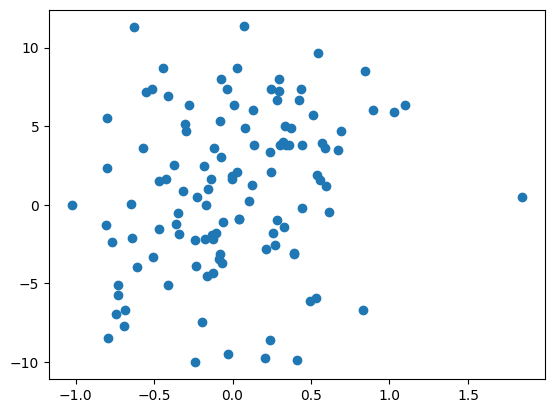

In [35]:
plt.scatter(filtered_df['x8'], filtered_df['y'])

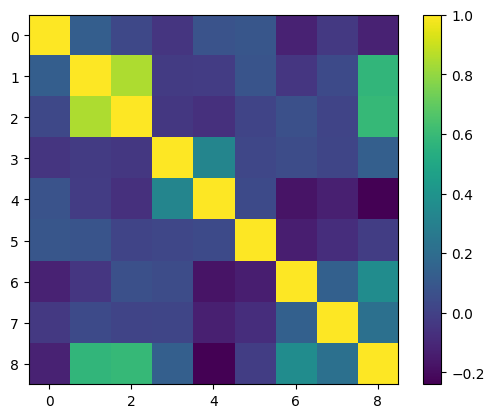

In [37]:
plt.imshow(filtered_df.corr())
plt.colorbar()

TODO
lasso and ridge on normalized data

/tmp/ipykernel_505368/968634966.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


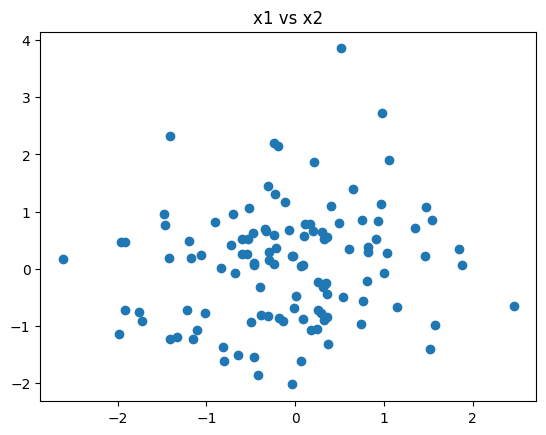

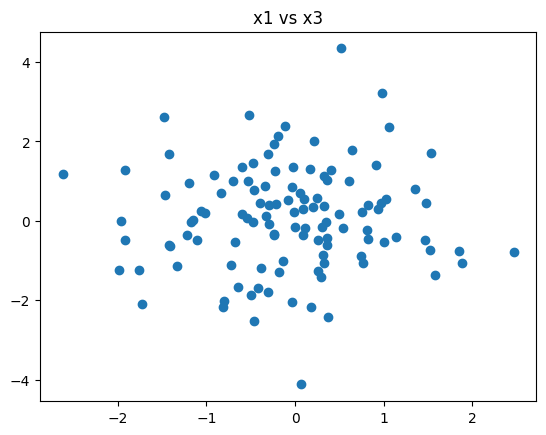

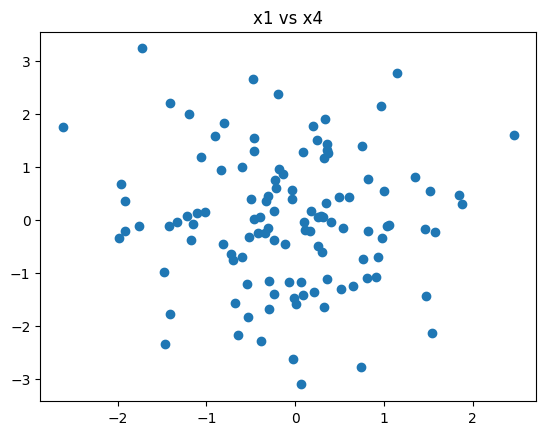

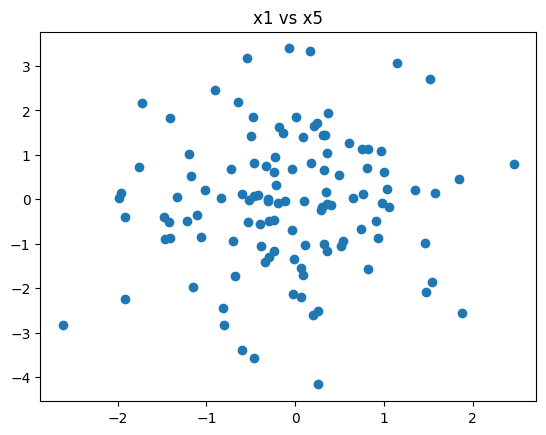

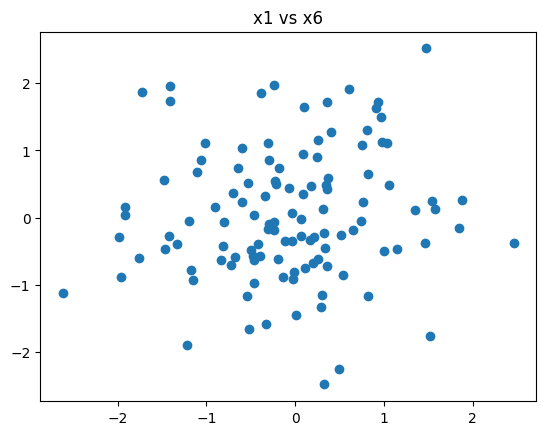

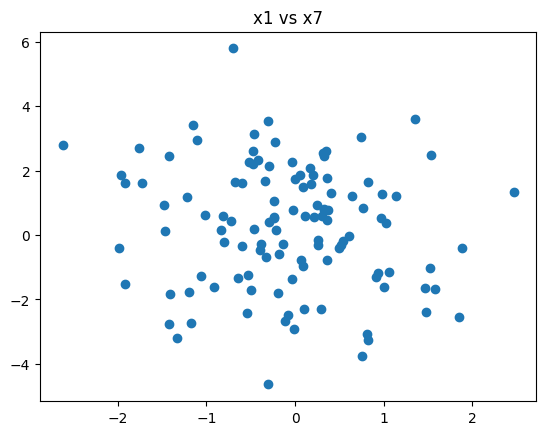

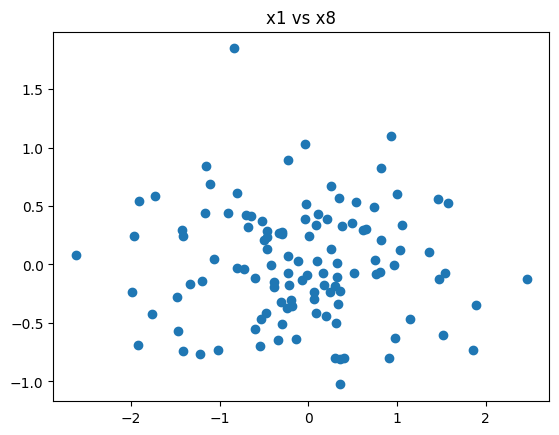

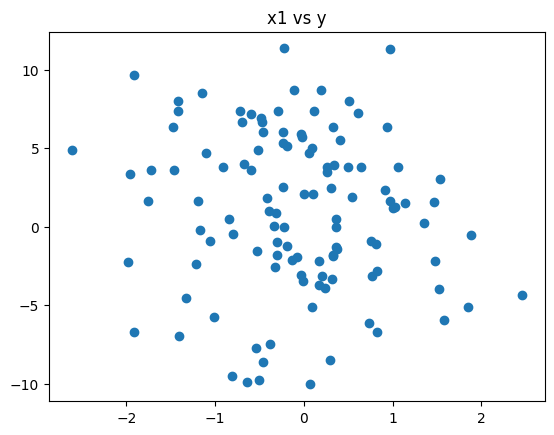

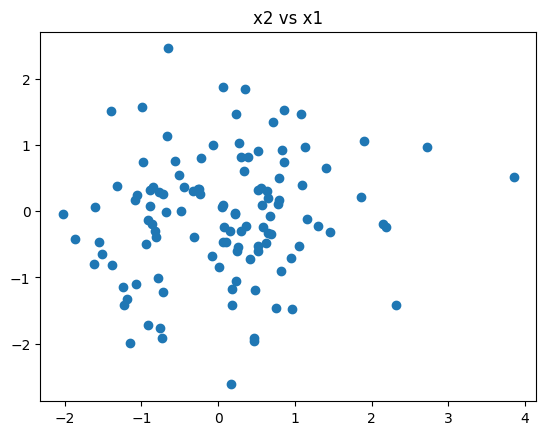

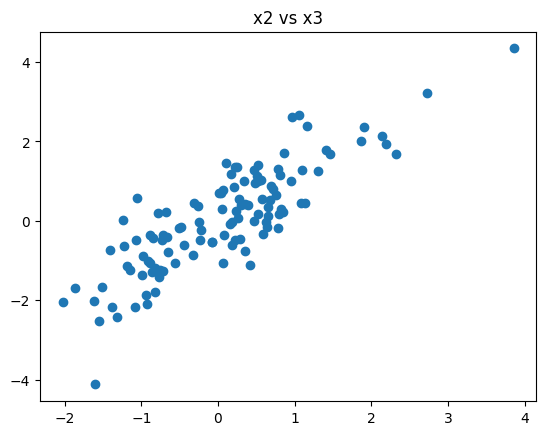

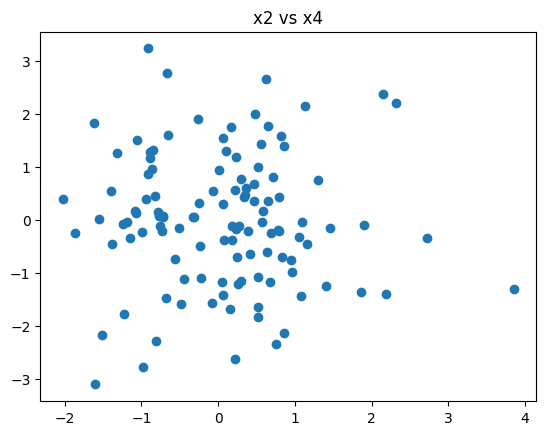

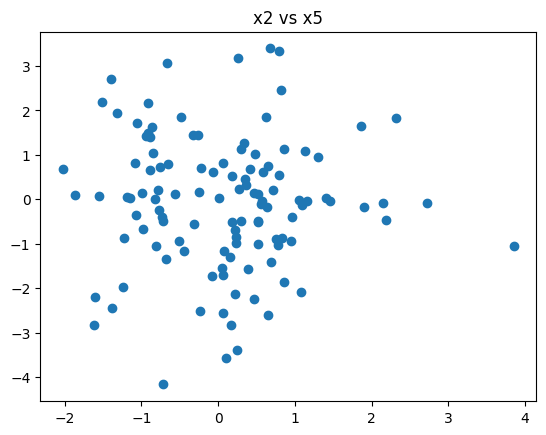

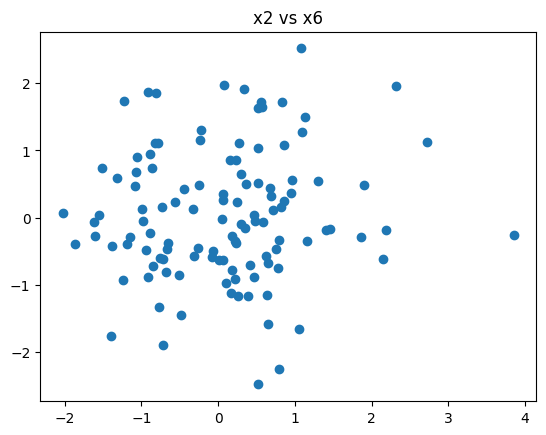

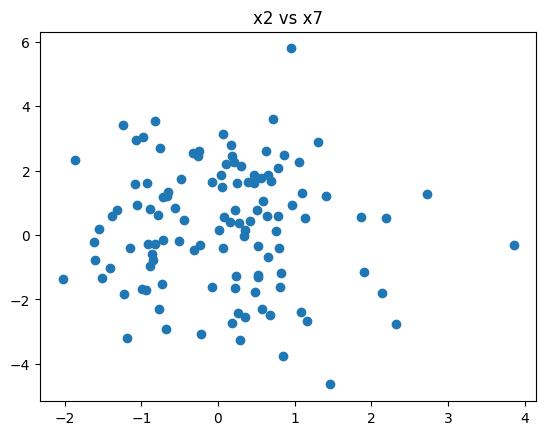

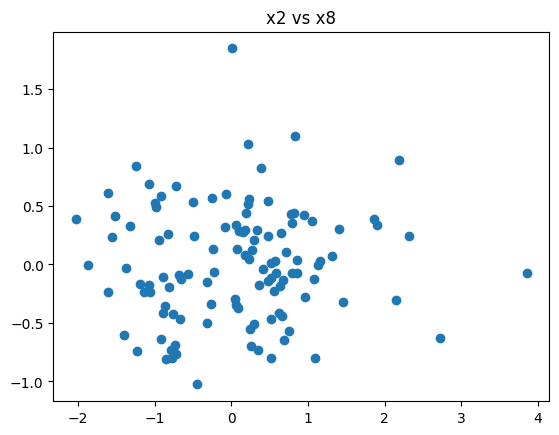

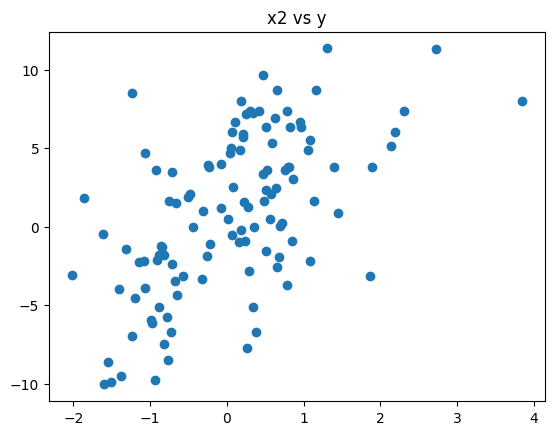

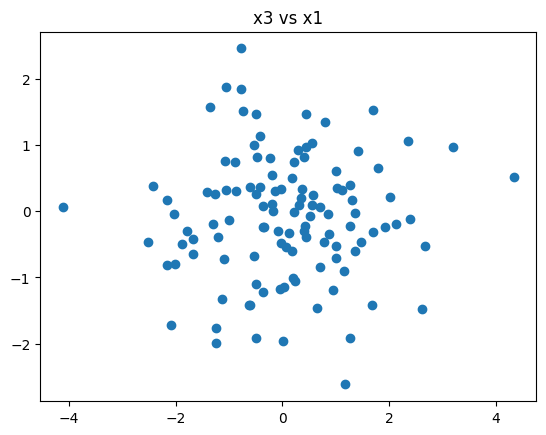

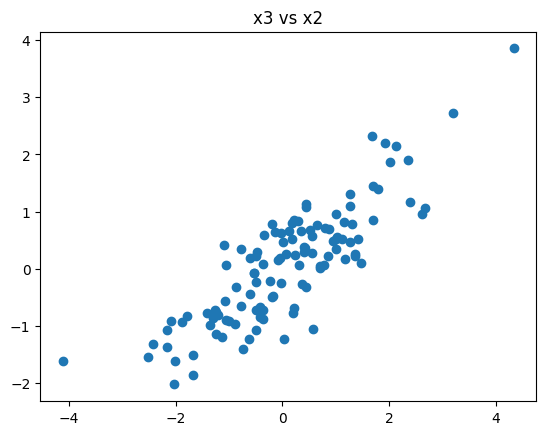

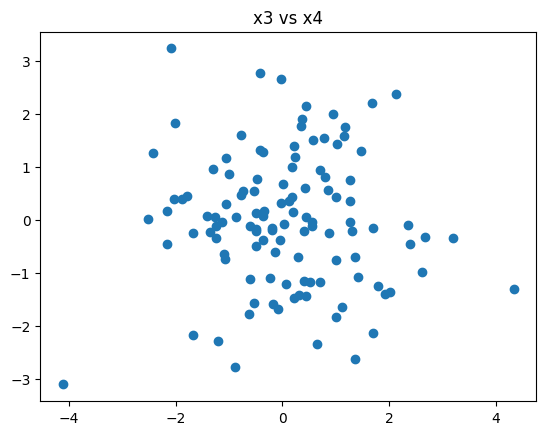

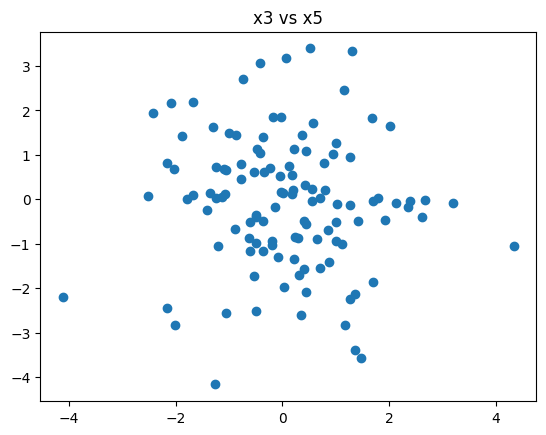

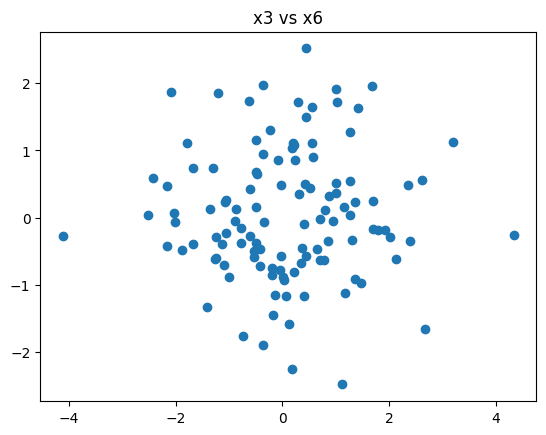

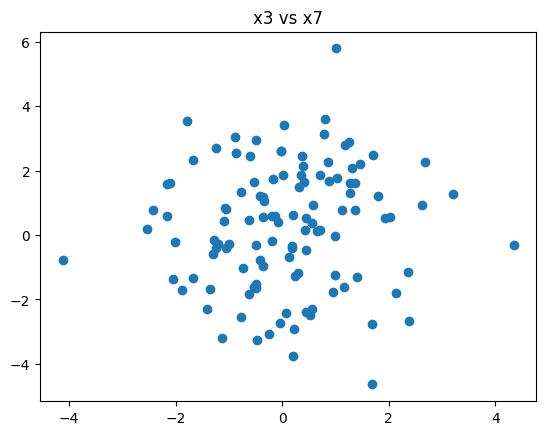

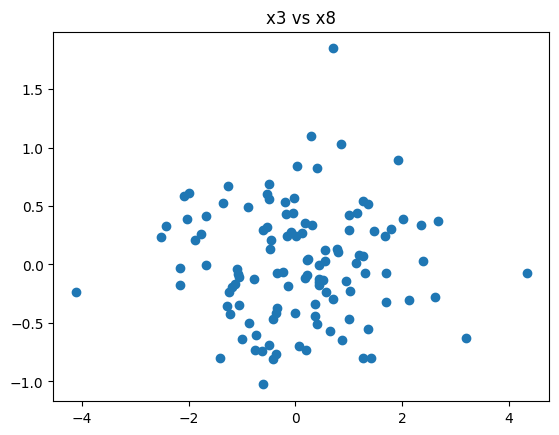

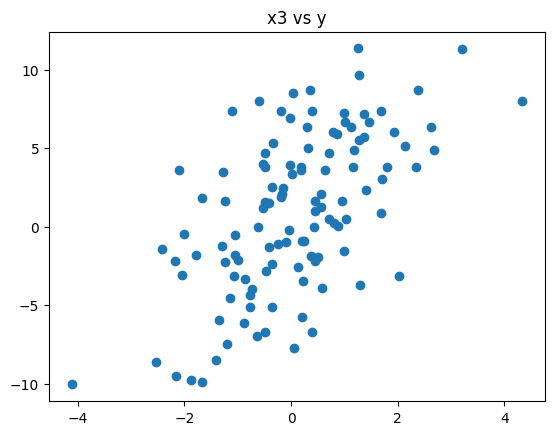

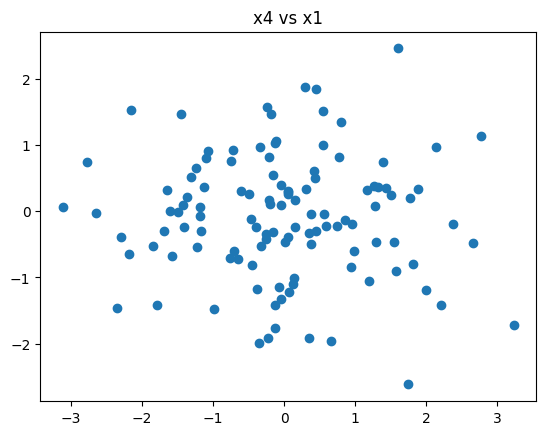

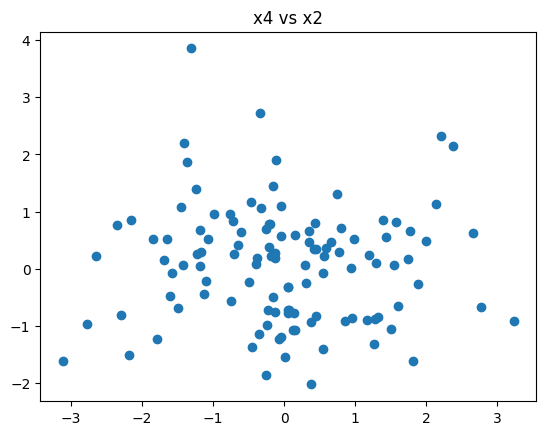

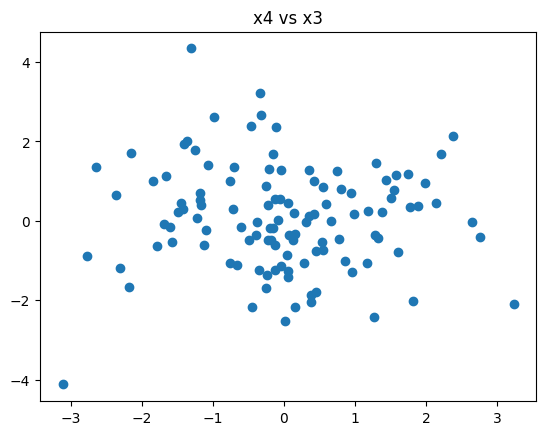

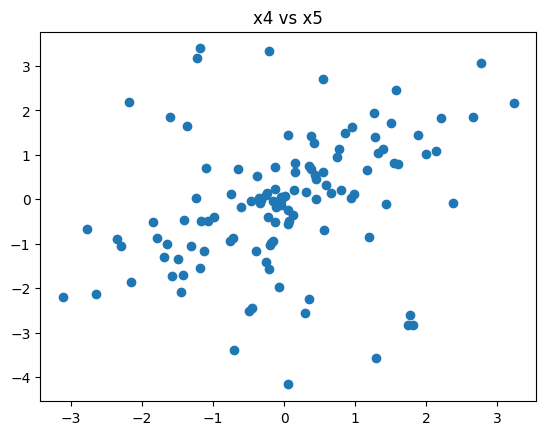

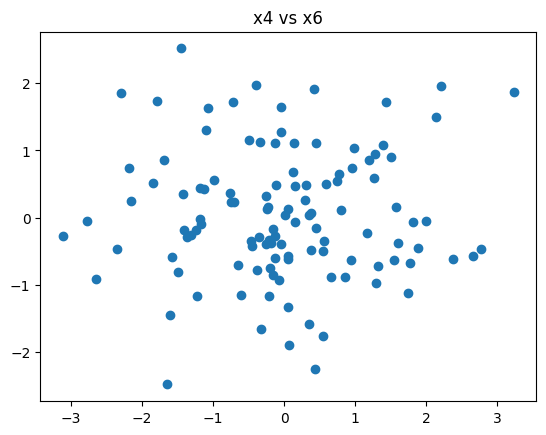

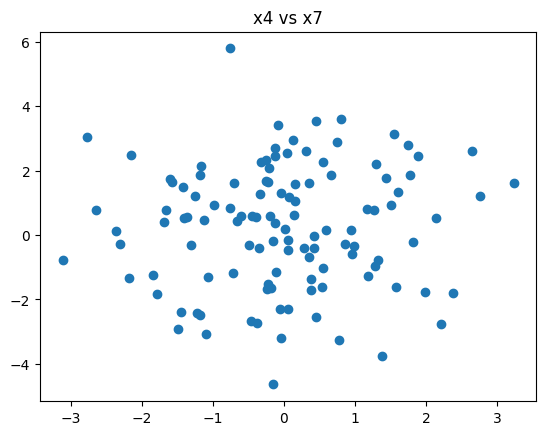

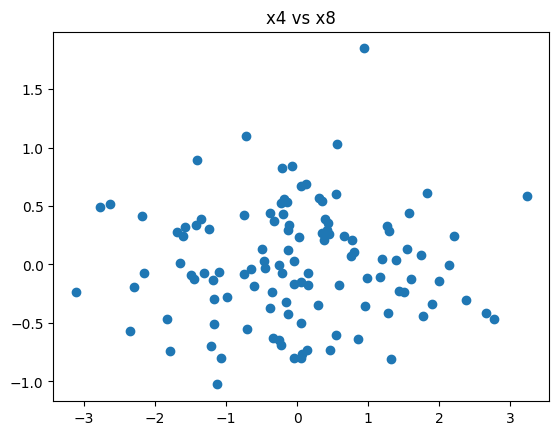

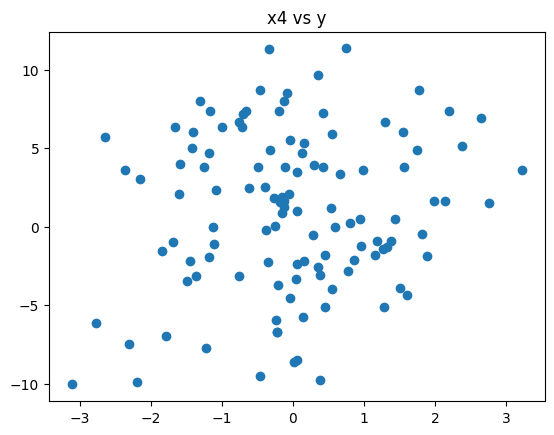

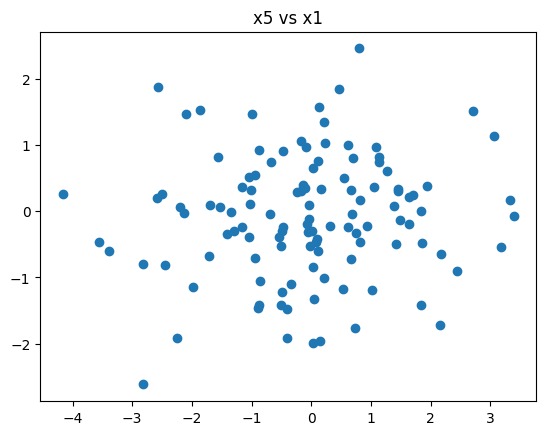

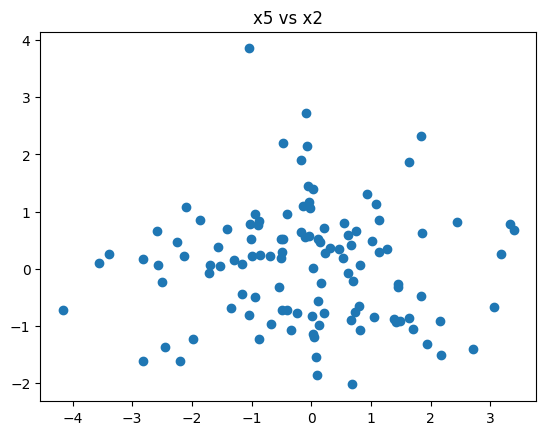

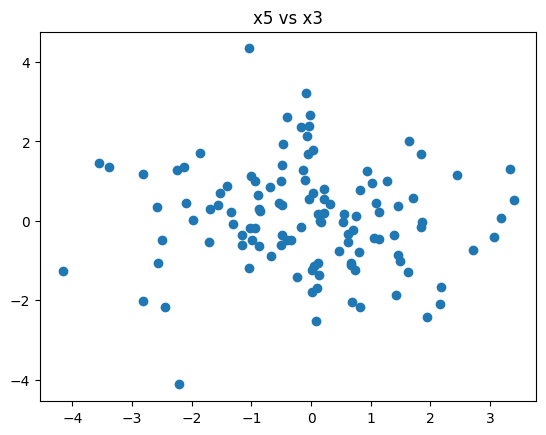

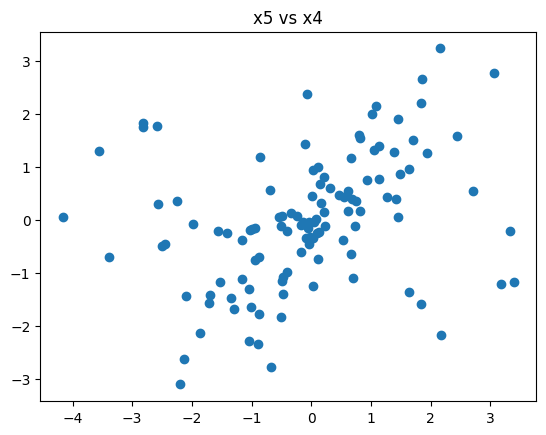

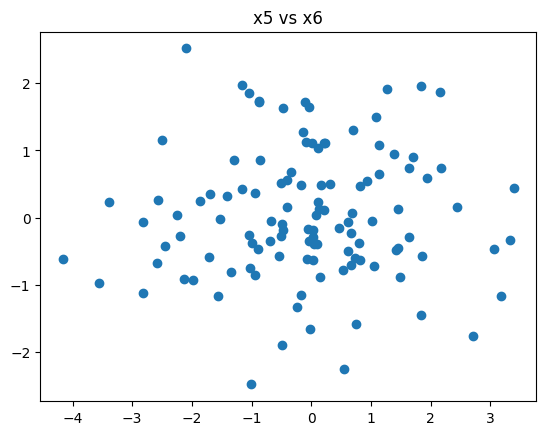

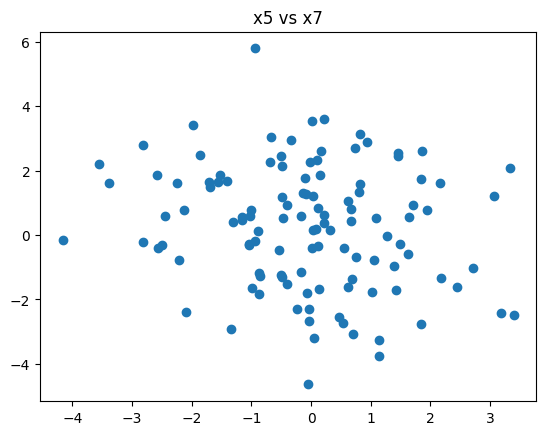

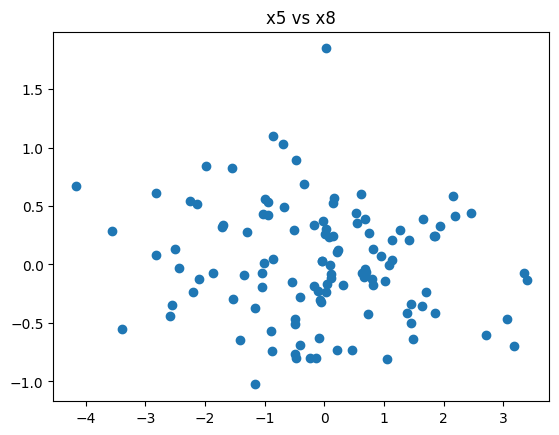

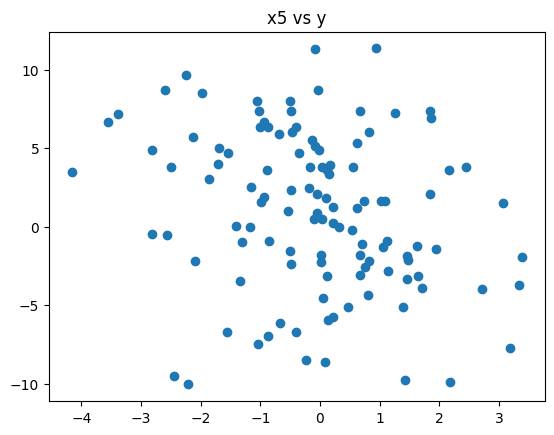

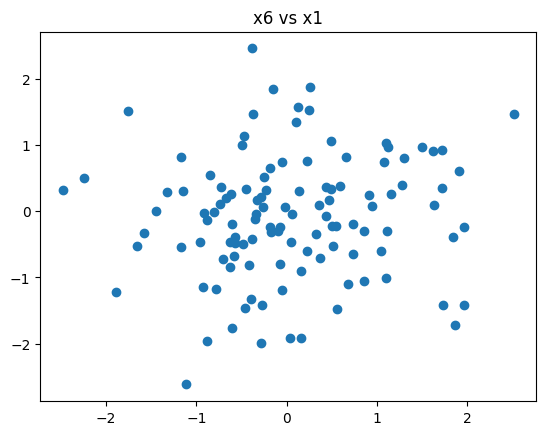

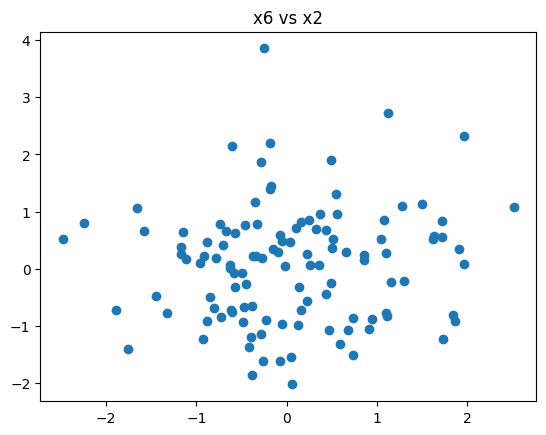

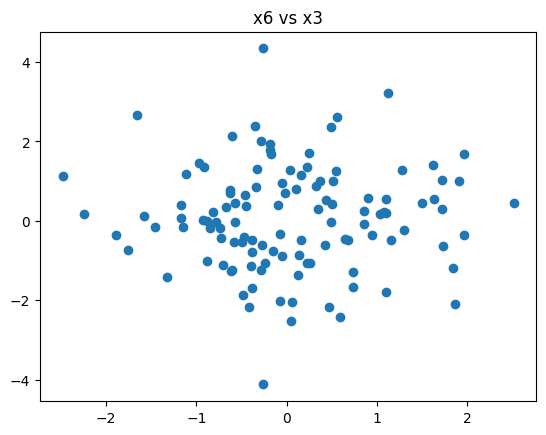

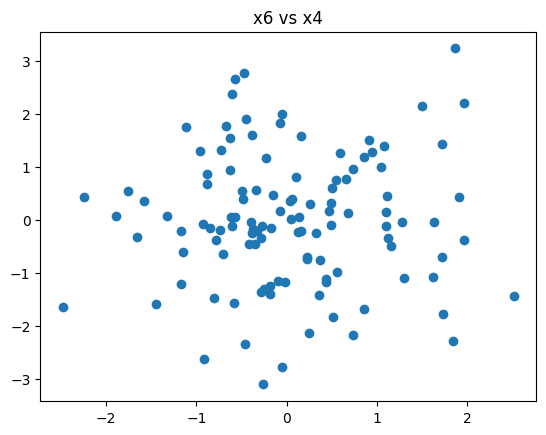

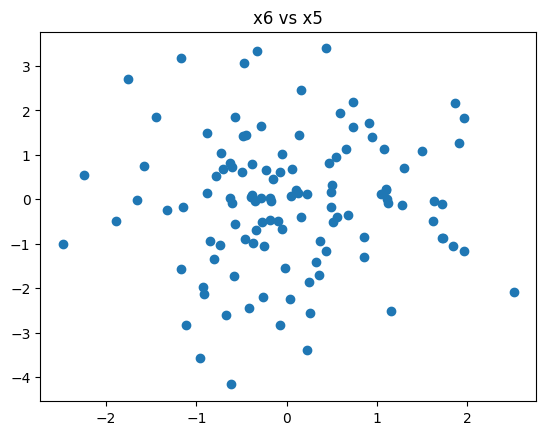

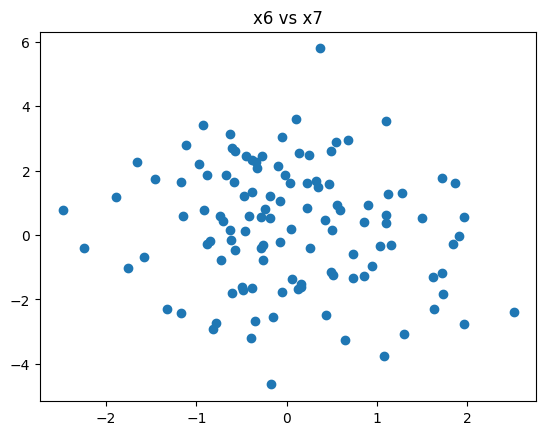

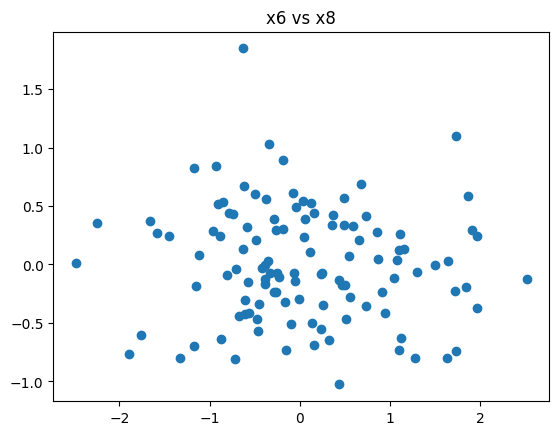

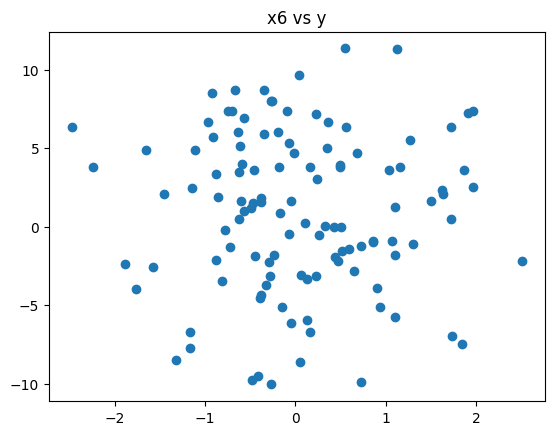

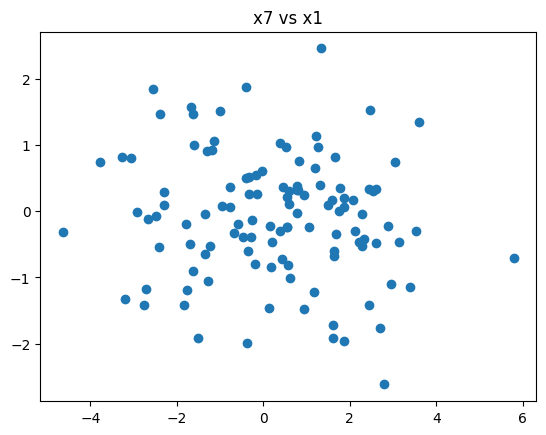

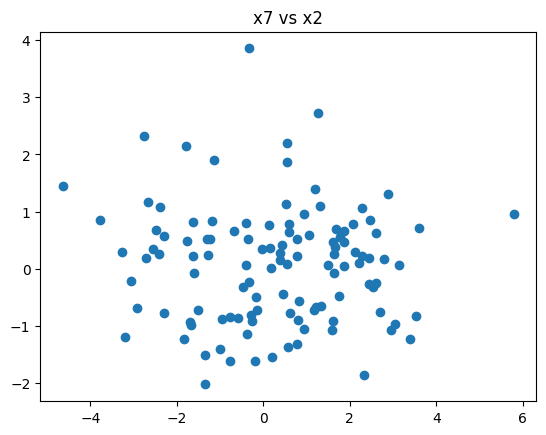

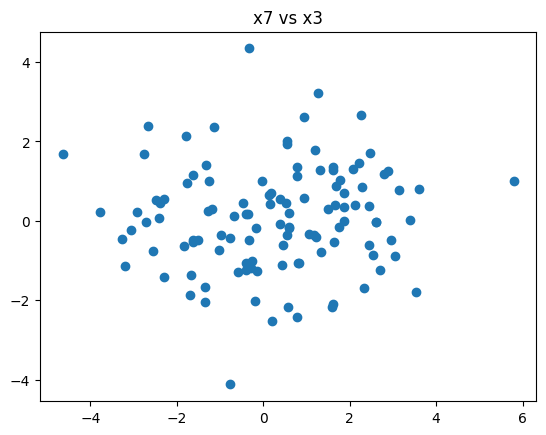

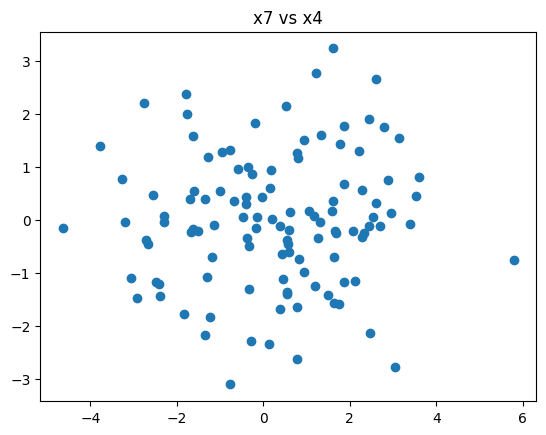

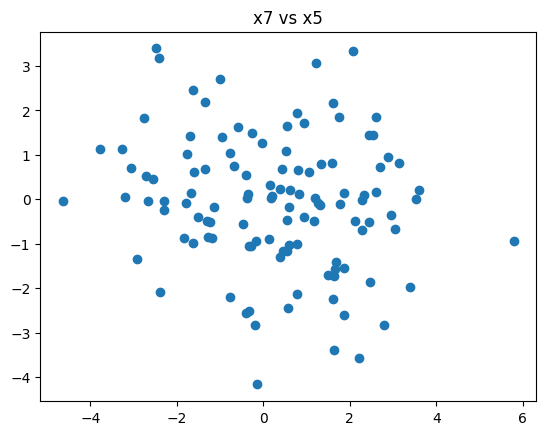

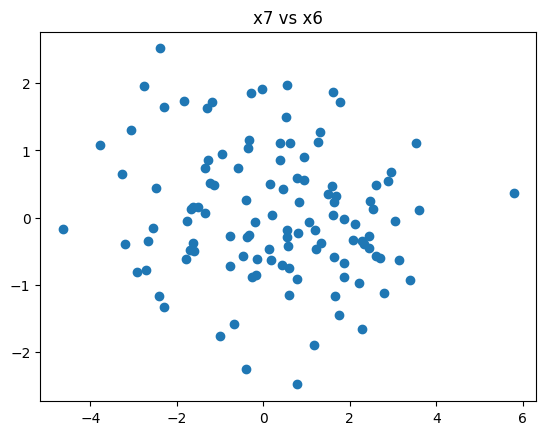

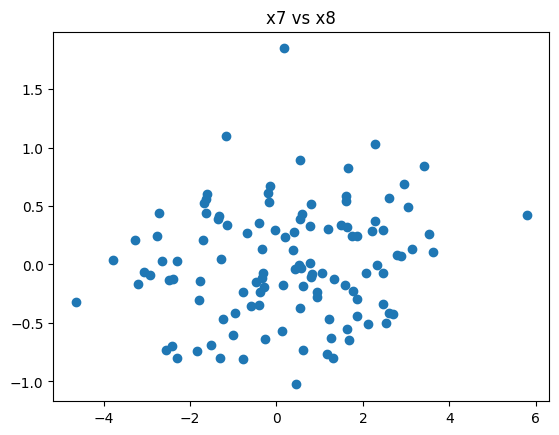

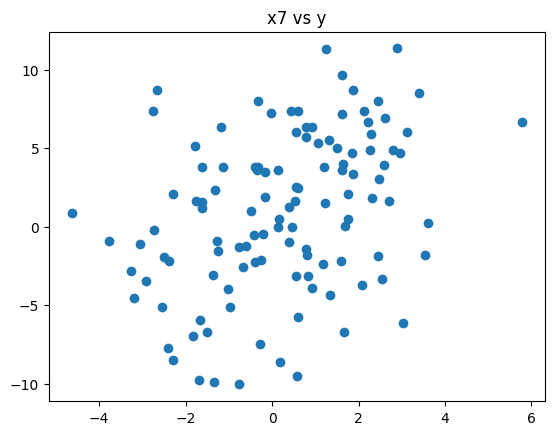

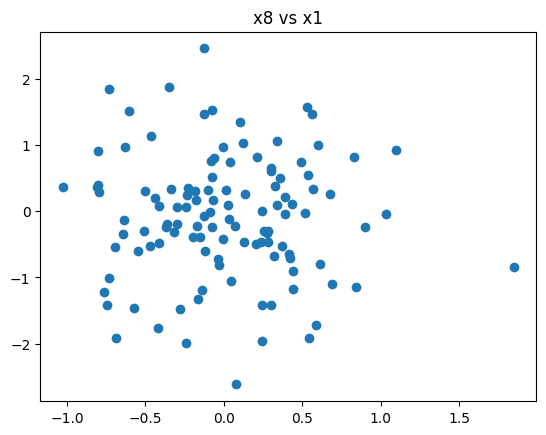

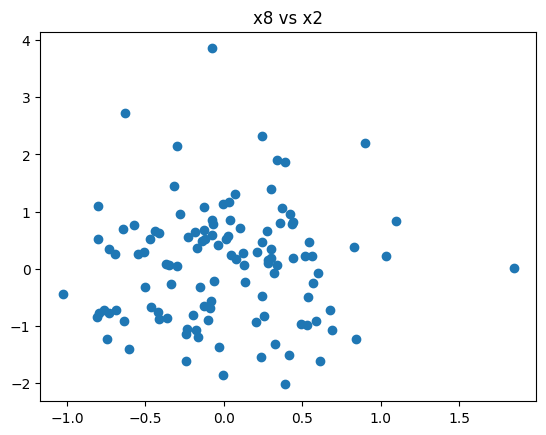

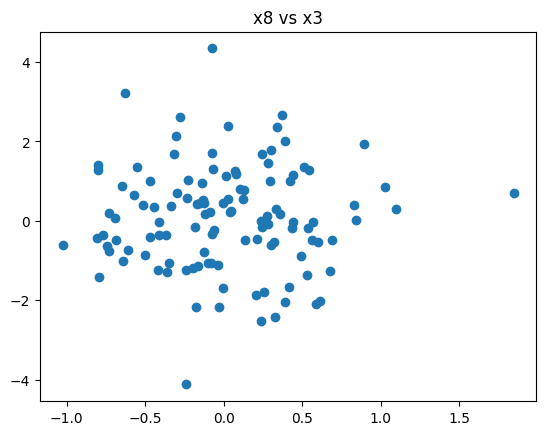

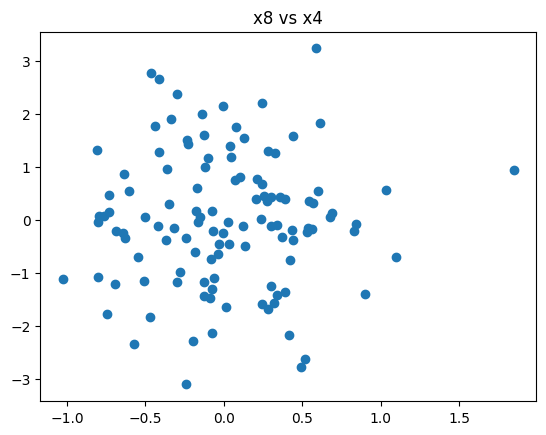

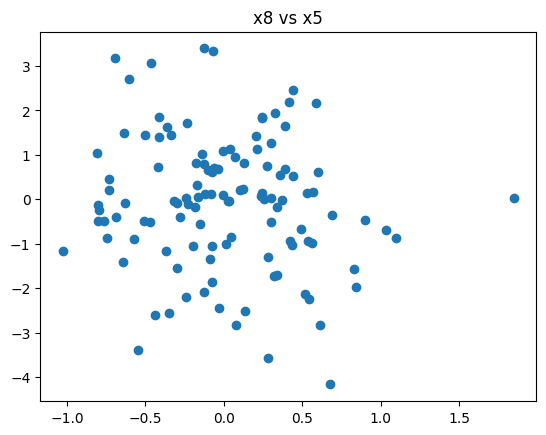

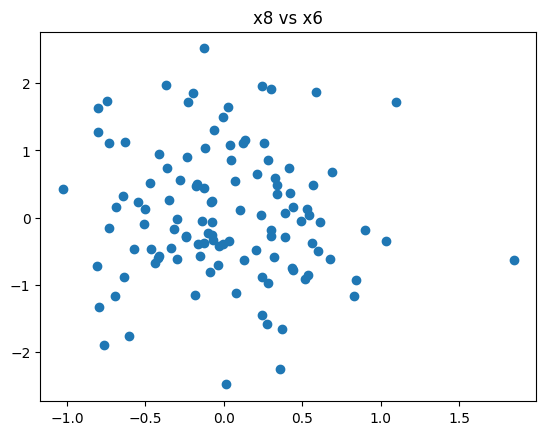

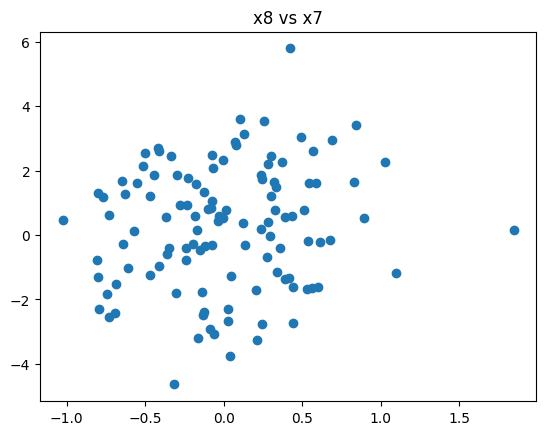

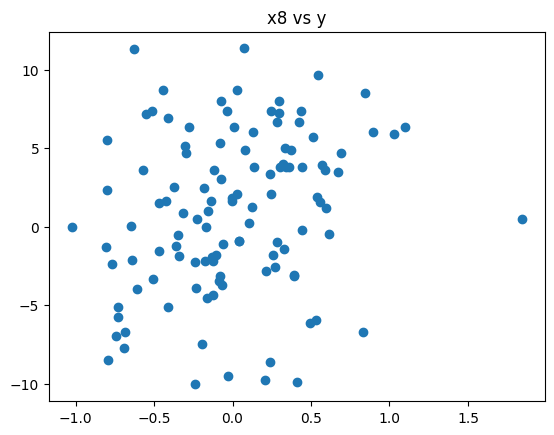

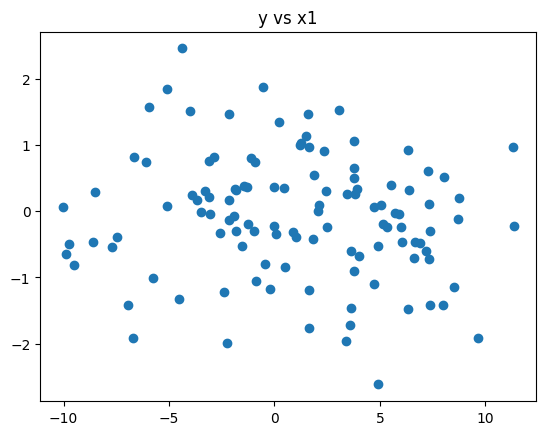

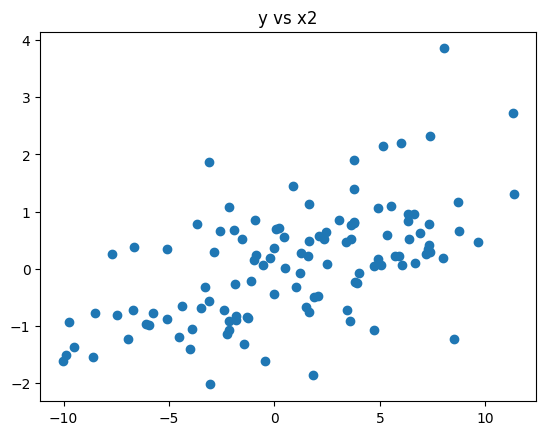

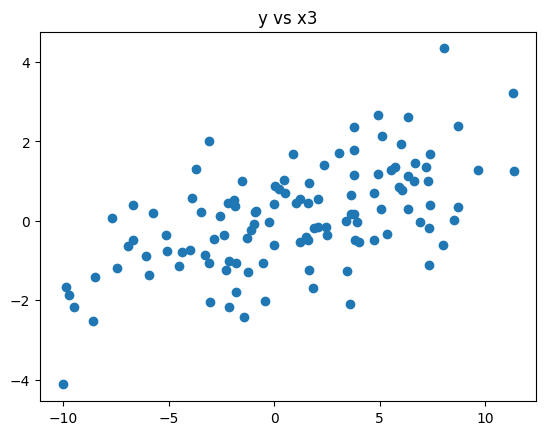

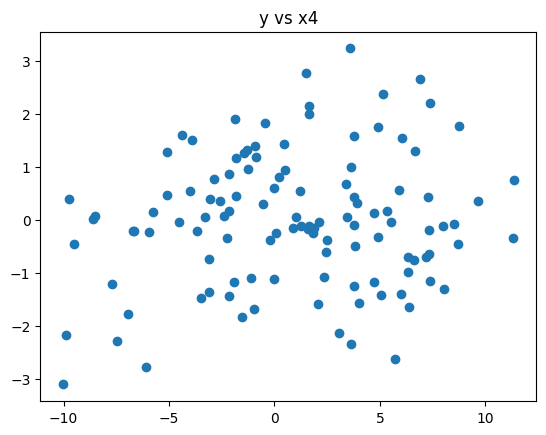

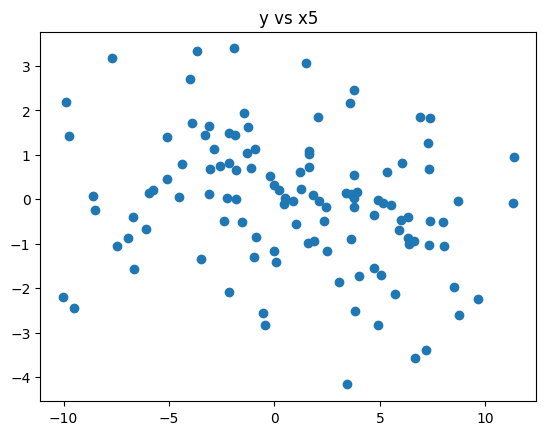

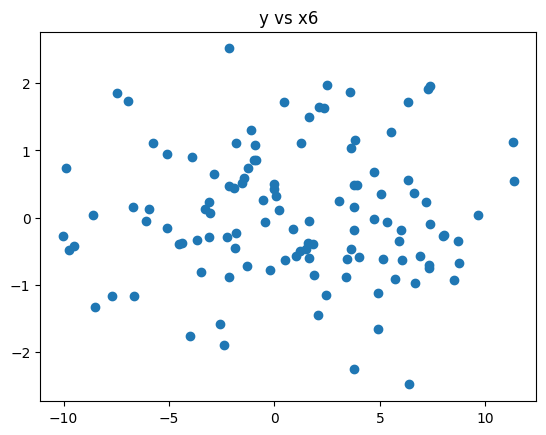

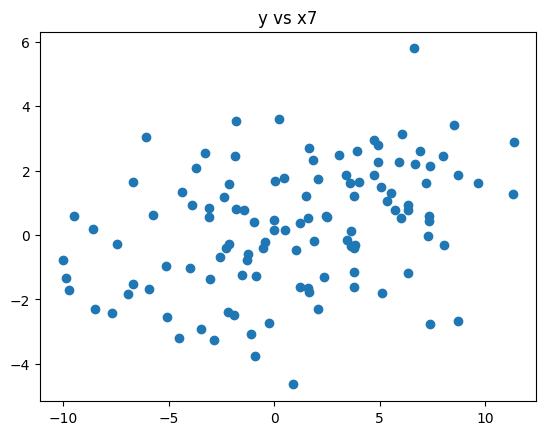

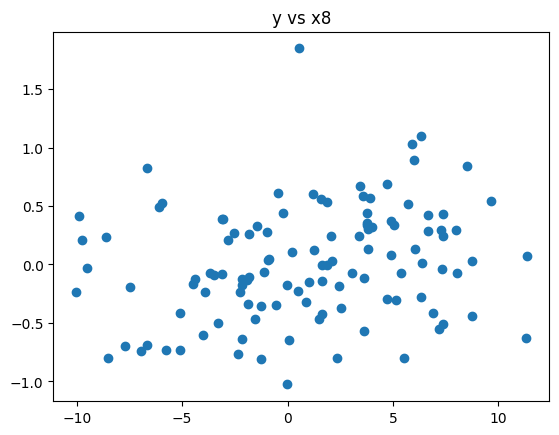

In [40]:
for col in filtered_df.columns:
    for col2 in filtered_df.columns:
        if col == col2:
            continue
        plt.figure()
        plt.scatter(filtered_df[col], filtered_df[col2])
        plt.title(f"{col} vs {col2}")